In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [4]:
df_clientes = pd.read_csv('doc.csv')
df_clientes.head()

,ID_Cliente,Idade,Genero,Tempo_no_Site_Minutos,Sessoes_por_Mes,Plataforma_Acesso,Assinante_Premium,Valor_Gasto_Anual
0,1,34,Feminino,12.5,15,Mobile App,Nao,550.75
1,2,45,Masculino,11.8,25,Desktop,Sim,850.20
2,3,28,Feminino,13.1,18,Mobile App,Nao,620.50
3,4,52,Masculino,10.2,30,Desktop,Sim,950.00
4,5,31,Nao-binario,14.0,22,Mobile App,Sim,890.80


In [5]:
df_clientes.info()
print("\n") 
df_clientes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             20 non-null     int64  
 1   Idade                  20 non-null     int64  
 2   Genero                 20 non-null     object 
 3   Tempo_no_Site_Minutos  20 non-null     float64
 4   Sessoes_por_Mes        20 non-null     int64  
 5   Plataforma_Acesso      20 non-null     object 
 6   Assinante_Premium      20 non-null     object 
 7   Valor_Gasto_Anual      20 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ KB




,ID_Cliente,Idade,Tempo_no_Site_Minutos,Sessoes_por_Mes,Valor_Gasto_Anual
count,20.00000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,36.85000,12.195000,23.000000,789.447500
std,5.91608,9.48281,1.309671,6.130167,154.505599
min,1.00000,22.00000,9.800000,15.000000,550.750000
25%,5.75000,29.75000,11.150000,18.000000,647.812500
50%,10.50000,35.00000,12.350000,21.500000,825.125000
75%,15.25000,43.50000,13.150000,28.250000,915.550000
max,20.00000,55.00000,14.200000,35.000000,1050.500000


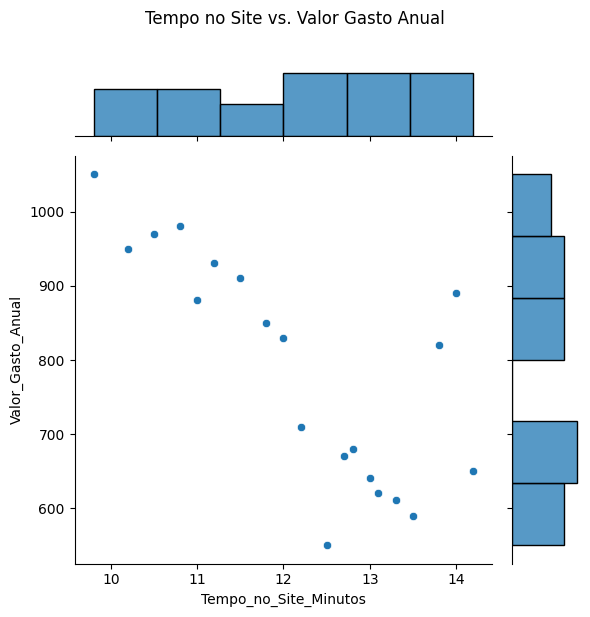

In [6]:
sns.jointplot(x='Tempo_no_Site_Minutos', y='Valor_Gasto_Anual', data=df_clientes, kind='scatter')
plt.suptitle('Tempo no Site vs. Valor Gasto Anual', y=1.02)
plt.tight_layout()
plt.show()

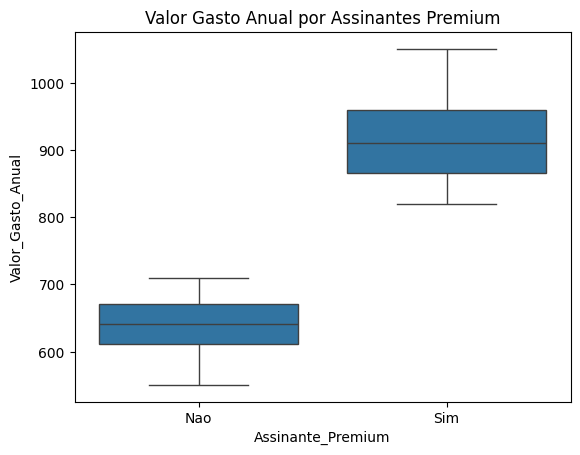

In [7]:
sns.boxplot(x='Assinante_Premium', y='Valor_Gasto_Anual', data=df_clientes)
plt.title('Valor Gasto Anual por Assinantes Premium')
plt.show()

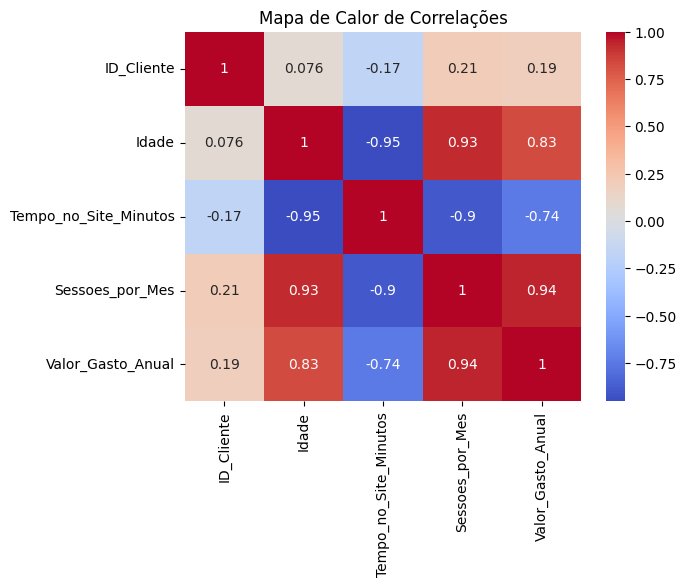

In [8]:
sns.heatmap(df_clientes.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlações')
plt.show()

In [9]:
df_processado = pd.get_dummies(df_clientes, columns=['Genero', 'Plataforma_Acesso', 'Assinante_Premium'], drop_first=True)
df_processado = df_processado.drop('ID_Cliente', axis=1)

print("Dataset após o pré-processamento:")
df_processado.head()

Dataset após o pré-processamento:


,Idade,Tempo_no_Site_Minutos,Sessoes_por_Mes,Valor_Gasto_Anual,Genero_Masculino,Genero_Nao-binario,Plataforma_Acesso_Mobile App,Plataforma_Acesso_Tablet,Assinante_Premium_Sim
0,34,12.5,15,550.75,False,False,True,False,False
1,45,11.8,25,850.20,True,False,False,False,True
2,28,13.1,18,620.50,False,False,True,False,False
3,52,10.2,30,950.00,True,False,False,False,True
4,31,14.0,22,890.80,False,True,True,False,True


In [ ]:
X = df_processado.drop('Valor_Gasto_Anual', axis=1)
y = df_processado['Valor_Gasto_Anual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


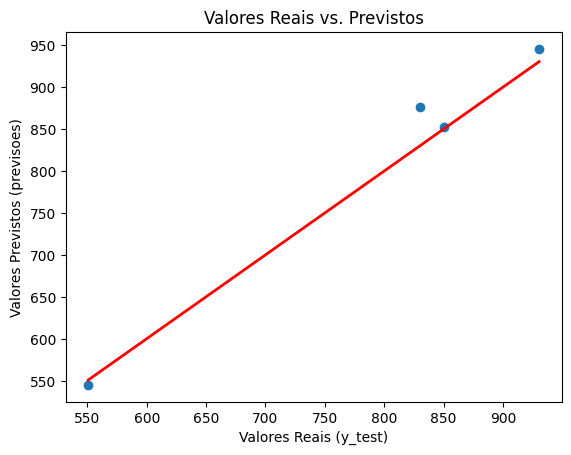

Mean Absolute Error (MAE): 17.25
Root Mean Squared Error (RMSE): 24.37
R² Score: 0.97


In [ ]:
previsoes = modelo.predict(X_test)

plt.scatter(y_test, previsoes)
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (previsoes)')
plt.title('Valores Reais vs. Previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()

mae = metrics.mean_absolute_error(y_test, previsoes)
mse = metrics.mean_squared_error(y_test, previsoes)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, previsoes)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:

novo_cliente = np.array([
    35, 13, 20, 1, 0, 1, 0, 1
]).reshape(1, -1)

previsao_novo_cliente = modelo.predict(novo_cliente)

print(f"Previsão de gasto anual para o novo cliente: R$ {previsao_novo_cliente[0]:.2f}")

Previsão de gasto anual para o novo cliente: R$ 839.33


c:\Users\Usuário\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
